In [1]:
import matplotlib.pyplot as plt
import aplpy
#matplotlib.rc("font", size=18)
import soxs
import astropy.units as u
from astropy.coordinates import SkyCoord
import subprocess #for running scripts
import os


soxs : [WARNING  ] 2023-03-06 23:32:59,185 Setting 'soxs_data_dir' to /Users/ryan/Library/Caches/soxs for this session. Please update your configuration if you want it somewhere else.


In [2]:
model_string = "tbabs*(ztbabs*cabs*cutoffpl+const*cutoffpl+pexrav+apec+apec)" # A somewhat complicated model
galnh = 4.68e-2
z = 0.1106
galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3 #"1.8,0.05,1.4,1.4,2.4,2.4",1.e-3

params = [galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3]
emin = 0.1
emax = 100.0
nbins = 20000
spec1 = soxs.spectra.Spectrum.from_xspec_model(model_string, params, emin, emax, nbins)

model_string = "tbabs*(ztbabs*cabs*cutoffpl+const*cutoffpl+pexrav+apec+apec)" # A somewhat complicated model
params = [galnh,1,z,1,1.8,300,1.e-3,0.005,1.8,300,1.e-3,1.8,300,-0.3,z,1,1,0.45,1.e-3,0.1,1.0,z,1.e-3,0.89,1.0,z,1.e-3]
emin = 0.1
emax = 100.0
nbins = 20000
spec2 = soxs.spectra.Spectrum.from_xspec_model(model_string, params, emin, emax, nbins)

In [3]:
flux1 = 5.0e-14 # erg/s/cm**2
flux2 = 5.0e-14 # erg/s/cm**2
emin = 2.0 # keV
emax = 10.0 # keV
spec1.rescale_flux(flux1, emin=emin, emax=emax, flux_type="energy")
spec2.rescale_flux(flux2, emin=emin, emax=emax, flux_type="energy")

n_H = 0.04 # 10^20 atoms/cm^2
spec1.apply_foreground_absorption(n_H)
spec2.apply_foreground_absorption(n_H)


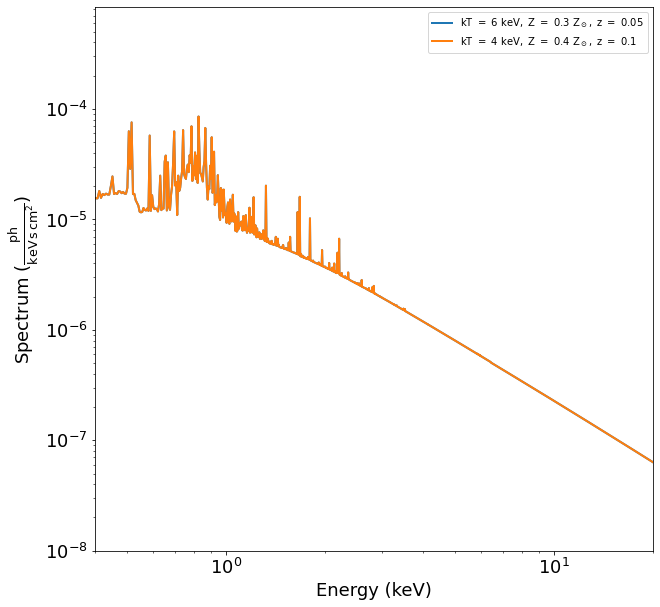

In [4]:
fig, ax = spec1.plot(xmin=0.4, xmax=20.0, ymin=10**-8, label="$\mathrm{kT\ =\ 6\ keV,\ Z\ =\ 0.3\ Z_\odot,\ z\ =\ 0.05}$")
spec2.plot(label="$\mathrm{kT\ =\ 4\ keV,\ Z\ =\ 0.4\ Z_\odot,\ z\ =\ 0.1}$",
           fig=fig, ax=ax)
ax.legend()

In [5]:
#from soxs import get_instrument_from_registry, add_instrument_to_registry
#hexphet = add_instrument_to_registry("HEXP_HET.json")


In [6]:
#new_hexp = get_instrument_from_registry("hexp_HETx2")
#new_hexp["name"] = "hexp_HETx2_abspathcheck" # Must change the name, otherwise an error will be thrown
#new_hexp["rmf"] = "/Users/ryan/Dropbox/GitHub/SOXS/HEXP_v03_rsp_files/HEXP_HET_v03.rmf" # Must change the name, otherwise an error will be thrown
#name = add_instrument_to_registry(new_hexp)

In [7]:
from soxs import PointSourceModel
from soxs import write_spectrum
from soxs import plot_spectrum

# Center of the field of view
ra0 = 30.0 # degrees
dec0 = 45.0 # degrees

# Create a list of RA and Dec offsets that we'll load into a function to generate a series of point sources \
# at varying separations
c0 = SkyCoord(ra0*u.deg, dec0*u.deg, frame='icrs')
c1 = SkyCoord(ra0*u.deg, dec0*u.deg, frame='icrs') 

sep=['50','40','30','20','15','10','5','0']
ras1 = [c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra,c1.ra]
decs1 = [c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec,c1.dec]
ras2 = []
decs2 = []
for i in sep:
    c2 = c0.directional_offset_by(90 * u.deg, int(i) * u.arcsec) 
    ras2.append(c2.ra)
    decs2.append(c2.dec)

print(ras2)
print(decs2)

#c2 = c0.directional_offset_by(90 * u.deg, -10.0 * u.arcsec) 
#RAsec = 0.25 / 60
#Decsec = 0.0166 / 60
#dra = 5 * RAsec
#ddec = 5 * Decsec

#c1 = SkyCoord(30*u.deg, 45*u.deg)
#c2 = SkyCoord(30*u.deg, 45.00027778*u.deg)
#print(c0.separation(c1).to("arcsec"))
#print(c0.separation(c2).to("arcsec"))
#print(c1.separation(c2).to("arcsec"))
#print(c2.ra/u.deg)
#print(c2.dec/u.deg)

#for i in ras2:
#    print(i/u.deg)
#print(ras2[0]/u.deg)


[<Longitude 30.01964185 deg>, <Longitude 30.01571348 deg>, <Longitude 30.01178511 deg>, <Longitude 30.00785674 deg>, <Longitude 30.00589256 deg>, <Longitude 30.00392837 deg>, <Longitude 30.00196419 deg>, <Longitude 30. deg>]
[<Latitude 44.99999832 deg>, <Latitude 44.99999892 deg>, <Latitude 44.99999939 deg>, <Latitude 44.99999973 deg>, <Latitude 44.99999985 deg>, <Latitude 44.99999993 deg>, <Latitude 44.99999998 deg>, <Latitude 45. deg>]


In [8]:
os.getcwd()
#os.chdir('../')

'/Users/ryan/Dropbox/GitHub/SOXS/HEXP'

In [9]:
def sim_duals(ras1,decs1,ras2,decs2,sep,exp):
    for i,j,x,y,k in zip(ras1,decs1,ras2,decs2,sep):
        # Making directory for the particular separation in question
        if not os.path.exists('Sep_'+str(k)+'as/'):
            os.mkdir('Sep_'+str(k)+'as/')
        os.chdir('Sep_'+str(k)+'as/')
        print('Now working in directory: ' + os.getcwd())
        #Now creating the spatial models
        pt_src1 = PointSourceModel(i, j)
        pt_src2 = PointSourceModel(x, y)
        #sep = str(i[::-1]).replace('.', 'p')
        # Generating the simput photon distributions convolved with a spatial model
        sou1_phlist = soxs.SimputPhotonList.from_models("AGN 1", spec1, pt_src1, (500.0, "ks"), (3.0, "m**2"))
        sou2_phlist = soxs.SimputPhotonList.from_models("AGN 2", spec2, pt_src2, (500.0, "ks"), (3.0, "m**2"))
        
        # Create the SIMPUT catalog "sim_cat" from the photon lists "cluster1" and "cluster2"
        sim_cat = soxs.SimputCatalog.from_source("dualagn_"+str(k)+"as_het_simput.fits", sou1_phlist, overwrite=True)
        sim_cat.append(sou2_phlist)
        
        ###### Now generating source region apertures for the sources
        rad=10
        str1 = 'circle('+str(i/u.deg)+','+str(j/u.deg)+','+str(rad)+'''\"'''+')' #+'''\\''' + '\"' 
        str2 = 'circle('+str(x/u.deg)+','+str(y/u.deg)+','+str(rad)+'''\"'''+')' #+'''\\''' + '\"' 
        with open("cir1_"+str(k)+".reg", 'w') as reg1:
            reg1.write('# Region file format: DS9 version 4.1 \n')
            reg1.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n')
            reg1.write('fk5 \n')
            reg1.write(str1) 
        with open("cir2_"+str(k)+".reg", 'w') as reg2:
            reg2.write('# Region file format: DS9 version 4.1 \n')
            reg2.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \n')
            reg2.write('fk5 \n')
            reg2.write(str2)
            
        # Here we are interfacing with SIXTE with a bash script to generate event files, science images, and spectra
        #%run sixte_duals_simulations.sh sep ras1 decs1 exp # Running the sixte simulations now
        #spex = subprocess.run('/Users/ryan/PIMMS/pimms', input=input)
        #repro = subprocess.run(['/Users/ryan/Dropbox/GitHub/XMM-Processing/spex_xmm', arg1, arg2, arg3, arg4, arg5])
        sim = subprocess.run('/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh '+ str(k) + ' ' + str(i/u.deg) + ' ' + str(j/u.deg) + ' ' + str(exp), shell=True)
        print(sim)
            # This takes in arguments for the separation, ra1 and dec1, and the exposure time choice
            # These are needed for naming conventions, assignment of the observation pointing, and the exposure time
        os.chdir('../')


In [10]:
#os.chdir('../')
os.getcwd()

'/Users/ryan/Dropbox/GitHub/SOXS/HEXP'

In [11]:
sim_duals(ras1,decs1,ras2,decs2,sep,50000)


soxs : [INFO     ] 2023-03-06 23:33:40,235 Creating 482852 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:33:40,318 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:33:40,401 Creating 481833 energies from this spectrum.


Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_50as


soxs : [INFO     ] 2023-03-06 23:33:40,479 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:33:40,605 Appending source 'AGN 1' to dualagn_50as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:33:40,773 Appending source 'AGN 2' to dualagn_50as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_50as_het_simput.fits' ...
try to load all spectra ('dualagn_50as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_50as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_50as_het_simput.fits' ...
try to load all spectra ('dualagn_50as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_50as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:37:02,955 Creating 483038 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:37:03,029 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:37:03,077 Creating 483359 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:37:03,147 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 50 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_40as


soxs : [INFO     ] 2023-03-06 23:37:03,278 Appending source 'AGN 1' to dualagn_40as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:37:03,474 Appending source 'AGN 2' to dualagn_40as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_40as_het_simput.fits' ...
try to load all spectra ('dualagn_40as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_40as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_40as_het_simput.fits' ...
try to load all spectra ('dualagn_40as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_40as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:40:29,914 Creating 482060 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:40:29,987 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:40:30,028 Creating 481455 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:40:30,096 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 40 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_30as


soxs : [INFO     ] 2023-03-06 23:40:30,240 Appending source 'AGN 1' to dualagn_30as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:40:30,442 Appending source 'AGN 2' to dualagn_30as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_30as_het_simput.fits' ...
try to load all spectra ('dualagn_30as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_30as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_30as_het_simput.fits' ...
try to load all spectra ('dualagn_30as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_30as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:43:50,885 Creating 482232 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:43:50,956 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:43:50,995 Creating 483204 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:43:51,065 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 30 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_20as


soxs : [INFO     ] 2023-03-06 23:43:51,214 Appending source 'AGN 1' to dualagn_20as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:43:51,392 Appending source 'AGN 2' to dualagn_20as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_20as_het_simput.fits' ...
try to load all spectra ('dualagn_20as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_20as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_20as_het_simput.fits' ...
try to load all spectra ('dualagn_20as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_20as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:47:06,032 Creating 481473 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:47:06,101 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:47:06,139 Creating 482393 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:47:06,207 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 20 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_15as


soxs : [INFO     ] 2023-03-06 23:47:06,331 Appending source 'AGN 1' to dualagn_15as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:47:06,519 Appending source 'AGN 2' to dualagn_15as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_15as_het_simput.fits' ...
try to load all spectra ('dualagn_15as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_15as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_15as_het_simput.fits' ...
try to load all spectra ('dualagn_15as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_15as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:50:26,661 Creating 481723 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:50:26,734 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:50:26,776 Creating 483030 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:50:26,849 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 15 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_10as


soxs : [INFO     ] 2023-03-06 23:50:27,020 Appending source 'AGN 1' to dualagn_10as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:50:27,227 Appending source 'AGN 2' to dualagn_10as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_10as_het_simput.fits' ...
try to load all spectra ('dualagn_10as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_10as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_10as_het_simput.fits' ...
try to load all spectra ('dualagn_10as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_10as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to patte

soxs : [INFO     ] 2023-03-06 23:53:53,604 Creating 483210 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:53:53,674 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:53:53,712 Creating 482304 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:53:53,782 Finished creating energies.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 10 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_5as


soxs : [INFO     ] 2023-03-06 23:53:53,924 Appending source 'AGN 1' to dualagn_5as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:53:54,094 Appending source 'AGN 2' to dualagn_5as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_5as_het_simput.fits' ...
try to load all spectra ('dualagn_5as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_5as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_5as_het_simput.fits' ...
try to load all spectra ('dualagn_5as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_5as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to pattern fil

soxs : [INFO     ] 2023-03-06 23:57:17,800 Creating 480997 energies from this spectrum.
soxs : [INFO     ] 2023-03-06 23:57:17,876 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:57:17,923 Creating 481782 energies from this spectrum.


initialize ...
calculate spectrum ...
store spectrum ...
cleaning up ...
finished successfully!

CompletedProcess(args='/Users/ryan/Dropbox/GitHub/SOXS/HEXP/sixte_duals_simulations.sh 5 30.0 45.0 50000', returncode=0)
Now working in directory: /Users/ryan/Dropbox/GitHub/SOXS/HEXP/Sep_0as


soxs : [INFO     ] 2023-03-06 23:57:17,997 Finished creating energies.
soxs : [INFO     ] 2023-03-06 23:57:18,139 Appending source 'AGN 1' to dualagn_0as_het_simput.fits.
soxs : [INFO     ] 2023-03-06 23:57:18,385 Appending source 'AGN 2' to dualagn_0as_het_simput.fits.


SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_0as_het_simput.fits' ...
try to load all spectra ('dualagn_0as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_0as_evt50ks_HET1.fits' ...
start simulation ...
100 %
copy events to pattern file ...
start sky projection ...

cleaning up ...
finished successfully!

SIXTE version 2.7.2
initialize ...
***SPII_read_key: Cannot find DETNAM keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
load source catalog from file 'dualagn_0as_het_simput.fits' ...
try to load all spectra ('dualagn_0as_het_simput.fits[PHLIST,1]') into cache ...
open event file 'sixtesim_raw.fits' ...
open event file 'sixtesim_0as_evt50ks_HET2.fits' ...
start simulation ...
100 %
copy events to pattern fil

In [42]:
def simxim(image,ang,instr,band,nrow,ncol,index):
    vminx, vmaxx = 0.1, 3.0   # For the X-ray image
    width, height = 2./60., 2./60.
    ra, dec = 30.0, 45.0
    scl = 10
    f1 = aplpy.FITSFigure(image, downsample=False, figure = fig, subplot=(nrow,ncol,index))
    f1.show_colorscale(vmin=vminx, vmax=vmaxx, cmap='viridis', stretch='log', smooth=3, kernel='gauss',) #smooth=3, kernel='gauss', 
    f1.recenter(ra, dec, width=width, height=height)
    #f1.show_circles(ra, dec, (45/(60*60)), color='white', linestyle='--', linewidth=2)
    f1.add_scalebar(scl/(60*60.))
    f1.scalebar.set_label('%s"' % scl)
    f1.scalebar.set_color('white')
    f1.scalebar.set_font_size(22)
    f1.ticks.hide()
    f1.tick_labels.hide()
    f1.axis_labels.hide()
    f1.frame.set_color('white')
    f1.add_label(0.15, 0.92, 'Sep='+str(ang)+u'\u2033', relative=True, size=22, color='white')
    f1.add_label(0.2, 0.07, band, relative=True, size=22, color='white')
    f1.add_label(0.8, 0.92, instr, relative=True, size=24, color='white')
    

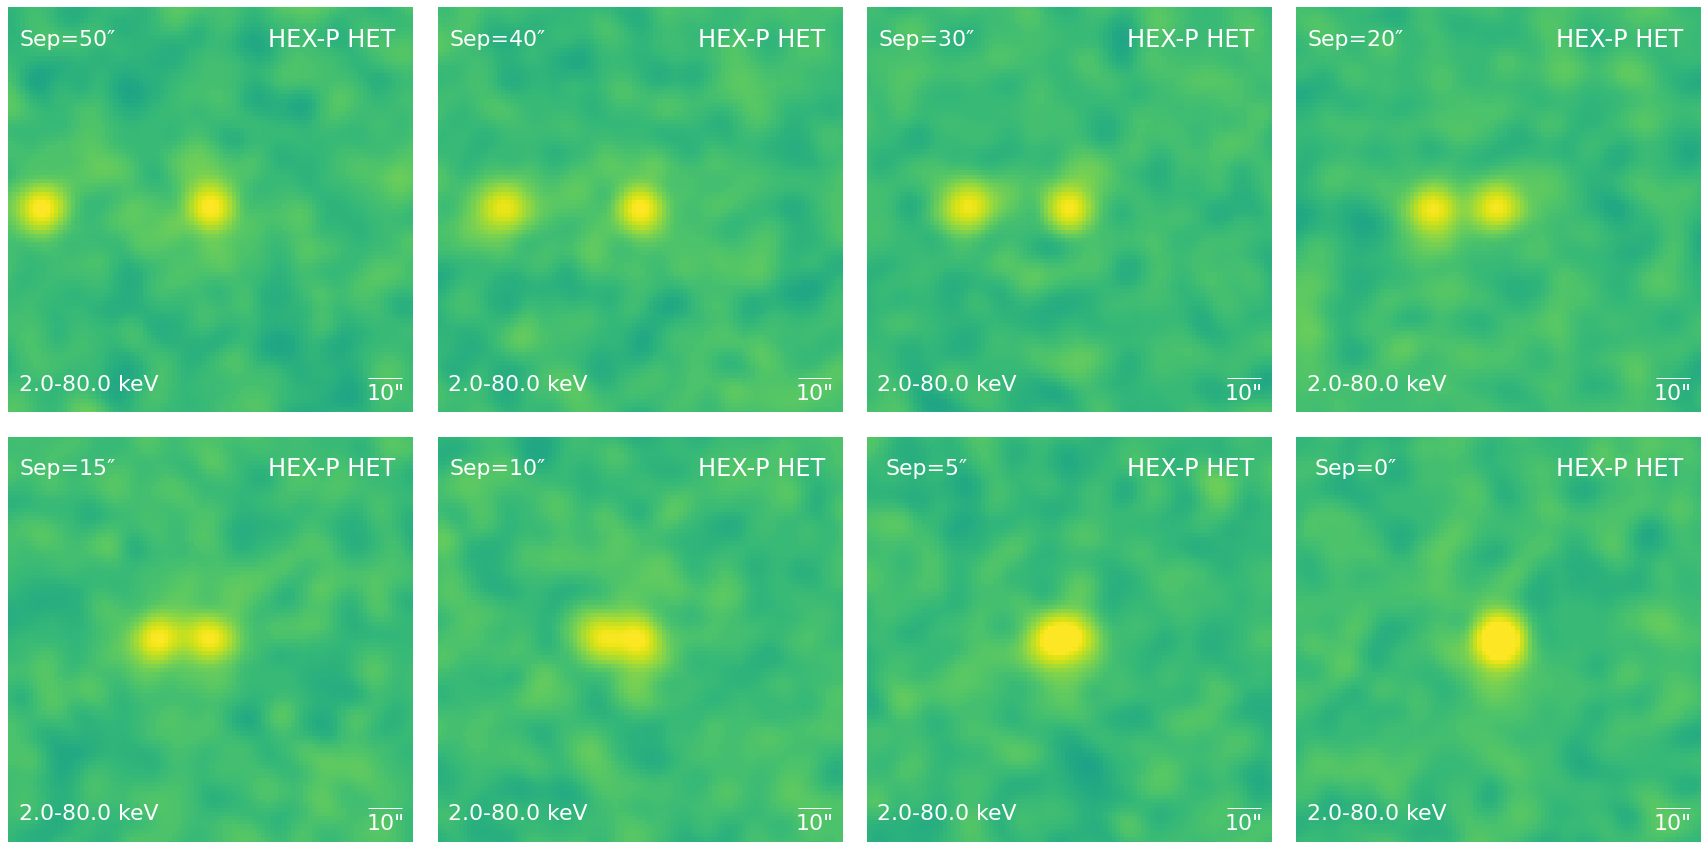

In [43]:
fig = plt.figure(figsize=(24,24))

simxim('Sep_50as/IMAGE_50as_img50ks_2HETeff.fits', 50, "HEX-P HET", "2.0-80.0 keV", 4, 4, 1)
simxim('Sep_40as/IMAGE_40as_img50ks_2HETeff.fits', 40, "HEX-P HET", "2.0-80.0 keV", 4, 4, 2)
simxim('Sep_30as/IMAGE_30as_img50ks_2HETeff.fits', 30, "HEX-P HET", "2.0-80.0 keV", 4, 4, 3)
simxim('Sep_20as/IMAGE_20as_img50ks_2HETeff.fits', 20, "HEX-P HET", "2.0-80.0 keV", 4, 4, 4)
simxim('Sep_15as/IMAGE_15as_img50ks_2HETeff.fits', 15, "HEX-P HET", "2.0-80.0 keV", 4, 4, 5)
simxim('Sep_10as/IMAGE_10as_img50ks_2HETeff.fits', 10, "HEX-P HET", "2.0-80.0 keV", 4, 4, 6)
simxim('Sep_5as/IMAGE_5as_img50ks_2HETeff.fits',   5, "HEX-P HET", "2.0-80.0 keV", 4, 4, 7)
simxim('Sep_0as/IMAGE_0as_img50ks_2HETeff.fits',   0, "HEX-P HET", "2.0-80.0 keV", 4, 4, 8)

plt.tight_layout()
plt.savefig('imaging_grid_smoothed.png', dpi=150)

plt.show()
